In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [ ]:
!ls


In [ ]:
df = pd.read_csv("DeathRecords.csv")

In [ ]:
df = df[df.AgeType==1]
df = df[df.Age<120]
df.info()

In [ ]:
df.MannerOfDeath.value_counts()

Code,Description

1,Accident

2,Suicide

3,Homicide

4,"Pending investigation"

5,"Could not determine"

6,Self-Inflicted

7,Natural

0,"Not specified"


In [ ]:
y = 1-(df["MannerOfDeath"]==7).astype(int)
#non_natural_death is 1 if the death was not from natural causes

In [ ]:
# Make 1-0 versions of these variables
df['Gender'] = (df['Sex']=='F').astype(int)
df['Autopsy'] = (df['Autopsy']=='Y').astype(int)


In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(df, y, test_size=0.3,
                                                    random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3,
                                                    random_state=42)

In [ ]:
X_train.info()

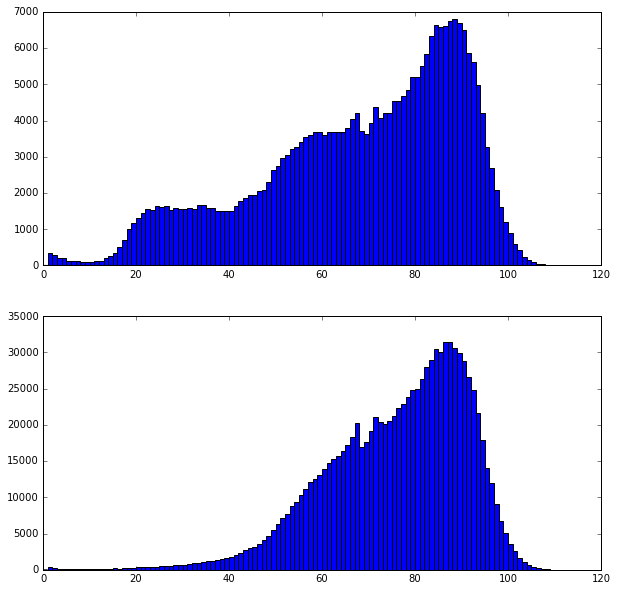

In [23]:
# Let's explore Age

plt.figure(figsize=(10, 10))


plt.subplot(2, 1, 1)
hist1 = plt.hist(X_train.loc[y==1,'Age'],bins=120,range=[0,120]);

plt.subplot(2, 1, 2)
hist0 = plt.hist(X_train.loc[y==0,'Age'],bins=120,range=[0,120]);

In [ ]:
# How else could we see if Age is suitable for logistic regression



In [ ]:
# let's also explore 'Autopsy" and 'Gender'




In [ ]:
X_train_1 = X_train.loc[:,['Gender','Age','Autopsy']]
X_test_1 = X_test.loc[:,['Gender','Age','Autopsy']]

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_1, y_train)
pred_vals_lr = model_lr.predict_proba(X_test_1)



In [ ]:
plt.hist(pred_vals_lr[:,1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    return (recallvec, precisionvec, threshvec)



In [ ]:
model_lr.coef_

In [ ]:
pr_curve(y_test,pred_vals_lr[:,1]);

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

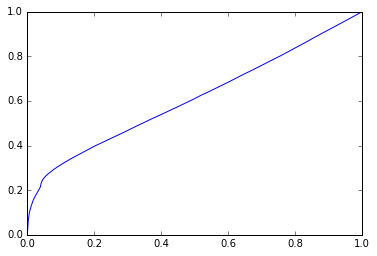

In [25]:
fpr, tpr, thresholds = roc_curve(y_test,pred_vals_lr[:,1])
plt.plot(fpr, tpr)



In [24]:
roc_auc_score(y_test,pred_vals_lr[:,1])

0.60945691592021056